In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# log_theta_file = "paad_mixed_08_003"
# cancer_type = "paad"
# event_file = "G12_PAADPANET_PM_z10_Events_30and5_Full"

log_theta_file = "luad_mixed_20_8_0035"
cancer_type = "luad"
event_file = "G13_LUAD_PM_z1_Events_20and8_Full"

log_theta = pd.read_csv(
    f"../results/{cancer_type}/{log_theta_file}.csv", index_col=0)
tau1, tau2 = np.exp(log_theta.pop("Sampling").iloc[:2])
events = log_theta.columns
log_theta = log_theta.to_numpy()
n = log_theta.shape[0] - 1

data = np.load(f"../simulations/{cancer_type}/{log_theta_file}.npy")

stats = pd.read_csv(
    f"../data/{cancer_type}/stats_{event_file}.csv", index_col=0, header=[0, 1])


In [206]:
stats

Coupled (358)                                 \
                            absent present_prim present_met  both   
P.Mut.TP53                    0.42         0.06        0.08  0.44   
P.Mut.KRAS                    0.75         0.05        0.03  0.17   
P.chr5.amp.single.1           0.53         0.11        0.16  0.19   
P.chr8.amp.single.1           0.55         0.14        0.19  0.12   
P.Mut.EGFR                    0.57         0.01        0.02  0.39   
P.chr14.amp.single.1          0.54         0.09        0.18  0.18   
P.chr18.del.single.1          0.65         0.13        0.15  0.07   
P.chr1.amp.single.3           0.69         0.12        0.15  0.04   
P.chr13.del.single.1          0.69         0.12        0.12  0.07   
P.chr15.del.single.1          0.72         0.11        0.14  0.03   
P.chr17.del.single.1          0.74         0.07        0.15  0.04   
P.Mut.STK11                   0.85         0.02        0.04  0.09   
P.Mut.KEAP1                   0.88         0.03        0.03  0.06   
P.Mut.RBM10                   0.90         0.02        0.02  0.06   
P.Mut.SMARCA4                 0.94         0.01        0.03  0.02   
P.Mut.ATM                     0.91         0.01        0.04  0.03   
P.Mut.NF1                     0.92         0.02        0.02  0.03   
P.Mut.PTPRD                   0.93         0.03        0.02  0.03   
P.Mut.ARID1A                  0.91         0.02        0.04  0.03   
P.Mut.PIK3CA                  0.92         0.03        0.02  0.03   
P.Mut.PTPRT                   0.94         0.02        0.02  0.02   
P.Mut.BRAF                    0.96         0.01        0.01  0.03   
P.Mut.EPHA3                   0.95         0.03        0.00  0.02   
P.Mut.SETD2                   0.94         0.02        0.01  0.03   
P.Mut.MGA                     0.95         0.02        0.01  0.02   
P.Mut.FAT1                    0.96         0.02        0.01  0.02   
P.Mut.RB1                     0.95         0.03        0.01  0.02   
P.Mut.MET                     0.95         0.01        0.01  0.03   
Seeding                       0.00         1.00        0.00  0.00   

                     Prim_no_met (561) Prim_met (1576) Met (1842)  
                               present         present    present  
P.Mut.TP53                        0.30            0.47       0.59  
P.Mut.KRAS                        0.40            0.37       0.31  
P.chr5.amp.single.1               0.22            0.29       0.37  
P.chr8.amp.single.1               0.21            0.28       0.39  
P.Mut.EGFR                        0.32            0.26       0.30  
P.chr14.amp.single.1              0.18            0.24       0.35  
P.chr18.del.single.1              0.14            0.17       0.29  
P.chr1.amp.single.3               0.14            0.22       0.25  
P.chr13.del.single.1              0.13            0.16       0.26  
P.chr15.del.single.1              0.12            0.16       0.23  
P.chr17.del.single.1              0.11            0.15       0.24  
P.Mut.STK11                       0.13            0.17       0.15  
P.Mut.KEAP1                       0.07            0.13       0.15  
P.Mut.RBM10                       0.15            0.11       0.10  
P.Mut.SMARCA4                     0.03            0.08       0.09  
P.Mut.ATM                         0.05            0.07       0.07  
P.Mut.NF1                         0.05            0.06       0.07  
P.Mut.PTPRD                       0.04            0.07       0.07  
P.Mut.ARID1A                      0.02            0.05       0.06  
P.Mut.PIK3CA                      0.05            0.06       0.05  
P.Mut.PTPRT                       0.04            0.05       0.06  
P.Mut.BRAF                        0.04            0.06       0.05  
P.Mut.EPHA3                       0.05            0.05       0.05  
P.Mut.SETD2                       0.05            0.04       0.05  
P.Mut.MGA                         0.05            0.04       0.05  
P.Mut.FAT1                        0.04       

In [207]:
# get the counts from the columns and rename them to just what they describe
relations = dict()
for column_name in stats.columns.get_level_values(0).to_list():
    name, no = column_name.split(" (")
    relations[name] = int(no[:-1])
stats.columns = pd.MultiIndex.from_tuples([(c[0].split(" ")[0], c[1]) for c in stats.columns])
stats


Coupled                                Prim_no_met  \
                      absent present_prim present_met  both     present   
P.Mut.TP53              0.42         0.06        0.08  0.44        0.30   
P.Mut.KRAS              0.75         0.05        0.03  0.17        0.40   
P.chr5.amp.single.1     0.53         0.11        0.16  0.19        0.22   
P.chr8.amp.single.1     0.55         0.14        0.19  0.12        0.21   
P.Mut.EGFR              0.57         0.01        0.02  0.39        0.32   
P.chr14.amp.single.1    0.54         0.09        0.18  0.18        0.18   
P.chr18.del.single.1    0.65         0.13        0.15  0.07        0.14   
P.chr1.amp.single.3     0.69         0.12        0.15  0.04        0.14   
P.chr13.del.single.1    0.69         0.12        0.12  0.07        0.13   
P.chr15.del.single.1    0.72         0.11        0.14  0.03        0.12   
P.chr17.del.single.1    0.74         0.07        0.15  0.04        0.11   
P.Mut.STK11             0.85         0.02        0.04  0.09        0.13   
P.Mut.KEAP1             0.88         0.03        0.03  0.06        0.07   
P.Mut.RBM10             0.90         0.02        0.02  0.06        0.15   
P.Mut.SMARCA4           0.94         0.01        0.03  0.02        0.03   
P.Mut.ATM               0.91         0.01        0.04  0.03        0.05   
P.Mut.NF1               0.92         0.02        0.02  0.03        0.05   
P.Mut.PTPRD             0.93         0.03        0.02  0.03        0.04   
P.Mut.ARID1A            0.91         0.02        0.04  0.03        0.02   
P.Mut.PIK3CA            0.92         0.03        0.02  0.03        0.05   
P.Mut.PTPRT             0.94         0.02        0.02  0.02        0.04   
P.Mut.BRAF              0.96         0.01        0.01  0.03        0.04   
P.Mut.EPHA3             0.95         0.03        0.00  0.02        0.05   
P.Mut.SETD2             0.94         0.02        0.01  0.03        0.05   
P.Mut.MGA               0.95         0.02        0.01  0.02        0.05   
P.Mut.FAT1              0.96         0.02        0.01  0.02        0.04   
P.Mut.RB1               0.95         0.03        0.01  0.02        0.02   
P.Mut.MET               0.95         0.01        0.01  0.03        0.05   
Seeding                 0.00         1.00        0.00  0.00        0.00   

                     Prim_met     Met  
                      present present  
P.Mut.TP53               0.47    0.59  
P.Mut.KRAS               0.37    0.31  
P.chr5.amp.single.1      0.29    0.37  
P.chr8.amp.single.1      0.28    0.39  
P.Mut.EGFR               0.26    0.30  
P.chr14.amp.single.1     0.24    0.35  
P.chr18.del.single.1     0.17    0.29  
P.chr1.amp.single.3      0.22    0.25  
P.chr13.del.single.1     0.16    0.26  
P.chr15.del.single.1     0.16    0.23  
P.chr17.del.single.1     0.15    0.24  
P.Mut.STK11              0.17    0.15  
P.Mut.KEAP1              0.13    0.15  
P.Mut.RBM10              0.11    0.10  
P.Mut.SMARCA4            0.08    0.09  
P.Mut.ATM                0.07    0.07  
P.Mut.NF1                0.06    0.07  
P.Mut.PTPRD              0.07    0.07  
P.Mut.ARID1A             0.05    0.06  
P.Mut.PIK3CA             0.06    0.05  
P.Mut.PTPRT              0.05    0.06  
P.Mut.BRAF               0.06    0.05  
P.Mut.EPHA3              0.05    0.05  
P.Mut.SETD2              0.04    0.05  
P.Mut.MGA                0.04    0.05  
P.Mut.FAT1               0.05    0.05  
P.Mut.RB1                0.04    0.05  
P.Mut.MET                0.05    0.04  
Seeding                  1.00    1.00

In [208]:
# setup comparison dataframe to put real and simulated data frequencies next to each other
comparison = stats.copy()
comparison.drop(("Coupled", "absent"), axis=1, inplace=True)
comparison.columns = pd.MultiIndex.from_tuples([(*c, "data") for c in comparison.columns])

In [209]:
# simulate t1s and "freeze" all simulated datapoints at these times
times1 = np.random.exponential(1/tau1, size=(data.shape[0], 1))
simulated_timed_1 = np.where(data < times1, data, 0)
(simulated_timed_1[:, -1] > 0).sum()


497975

In [210]:
# simulate \Delta ts and "freeze" all simulated datapoints at t2
times2 = np.random.exponential(1/tau2, size=(data.shape[0], 1))
simulated_timed_2 = np.where(data < times1 + times2, data, 0)
(simulated_timed_2[:, -1] > 0).sum()


731432

In [211]:
# get all the samples at t1 that never (as far as t2) develop a metastasis
never_met = simulated_timed_1[simulated_timed_2[:, -1] == 0]
# get all the samples at t1 and t2 that already have a metastasis at t1
met = simulated_timed_1[simulated_timed_1[:, -1] > 0]
coupled = simulated_timed_2[simulated_timed_1[:, -1] > 0]


In [212]:
# binarize the met_t2s and get the event frequencies for mets and pts
coupled_bin = (coupled > 0).astype(int)
# split frequencies into pt and met part
coupled_pt_bin = coupled_bin[:, ::2]
coupled_met_bin = np.hstack([coupled_bin[:, 1::2], coupled_bin[:, [-1]]])
# split into both, met_only, pt_only
coupled_both_bin = coupled_pt_bin & coupled_met_bin
coupled_pt_bin = coupled_pt_bin - coupled_both_bin
coupled_met_bin = coupled_met_bin - coupled_both_bin
# get their frequencies
coupled_both_frequencies = coupled_both_bin.sum(axis=0) / coupled_both_bin.shape[0]
coupled_pt_frequencies = coupled_pt_bin.sum(axis=0) / coupled_pt_bin.shape[0]
coupled_met_frequencies = coupled_met_bin.sum(axis=0) / coupled_met_bin.shape[0]

comparison["Coupled", "both", "simulated"] = coupled_both_frequencies
comparison["Coupled", "present_prim", "simulated"] = coupled_pt_frequencies
comparison["Coupled", "present_met", "simulated"] = coupled_met_frequencies

In [213]:
# binarize the nevermets and get the event frequencies for these
never_met_bin = (never_met > 0).astype(int)
never_met_frequencies = never_met_bin.sum(axis=0) / never_met_bin.shape[0]
never_met_frequencies = never_met_frequencies[::2]
comparison["Prim_no_met", "present", "simulated"] = never_met_frequencies


In [214]:
# binarize the mets and get the event frequencies for mets and prims with mets
met_bin = (met > 0).astype(int)
met_frequencies = met_bin.sum(axis=0) / met_bin.shape[0]
prim_met_frequencies = met_frequencies[::2]
met_frequencies = np.append(met_frequencies[1::2], met_frequencies[-1])
comparison["Prim_met", "present", "simulated"] = prim_met_frequencies
comparison["Met", "present", "simulated"] = met_frequencies


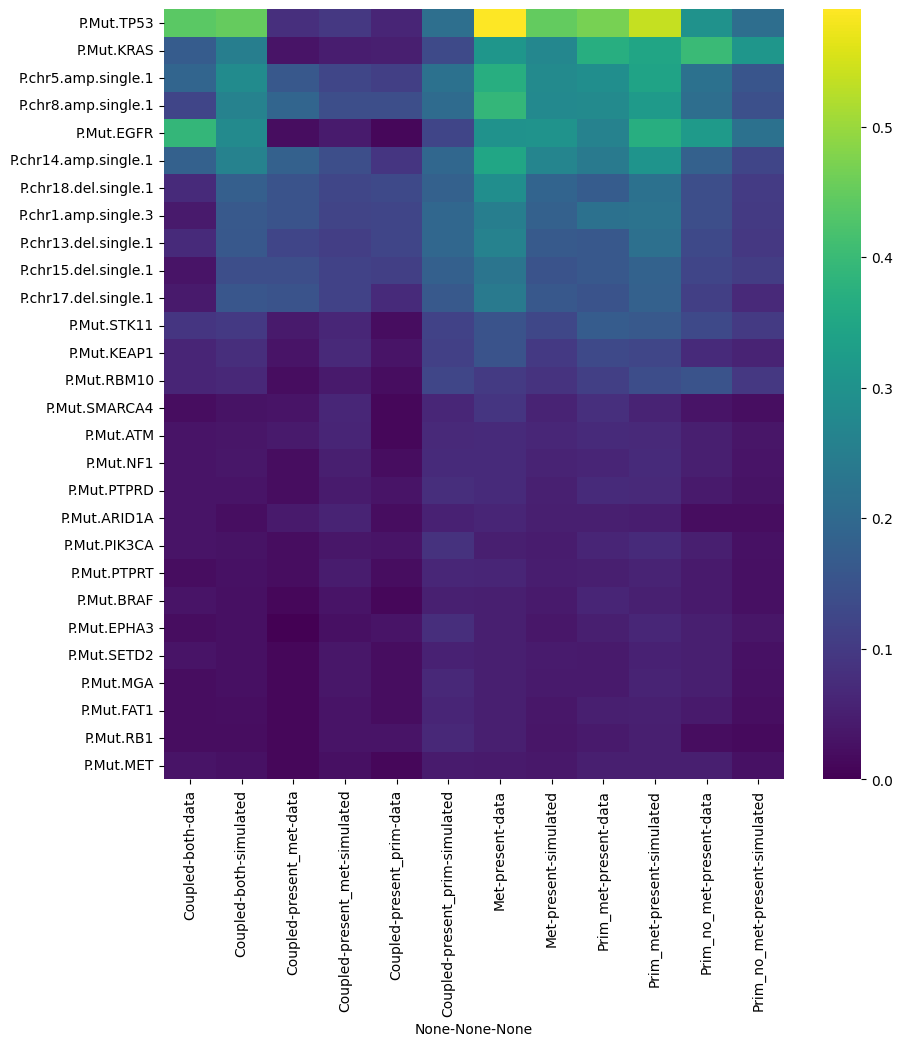

In [215]:
comparison.drop("Seeding", inplace=True)
f, a = plt.subplots(figsize=(10,10))
comparison.sort_index(axis=1, inplace=True)
sns.heatmap(comparison, cmap="viridis", ax=a)
f.savefig(f"./../viz/{cancer_type}/{log_theta_file}_frequencies.png", bbox_inches="tight")